# 기계학습

### 담당교수 : 장원중

In [1]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [2]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# [실습] 주성분 분석이 필요한 이유   

In [54]:
# 기본 데이터 분석을 위한 Library
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn에 있는 기본 데이터셋을 가져오기 위함 
from sklearn import datasets

# sklearn의 PCA를 통해서 쉽게 PCA 적용가능
from sklearn.decomposition import PCA

In [55]:
# 판다스의 scatter_matrix 함수를 사용해서 데이터 전체를 한 번에 시각화
# pd.plotting.scatter_matrix() 함수는 Pandas에서 산점 행렬(scatter matrix)을 생성하는 데 사용 
# 산점 행렬은 데이터프레임의 열 간의 상호 관계를 시각적으로 분석하기 위한 유용한 도구 
# 이 함수를 사용하면 데이터프레임의 열 간의 모든 가능한 산점도(두 열 간의 관계를 나타내는 그래프)를 하나의 그림에 표시할 수 있음 

#loading dataset
iris = datasets.load_iris()

#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


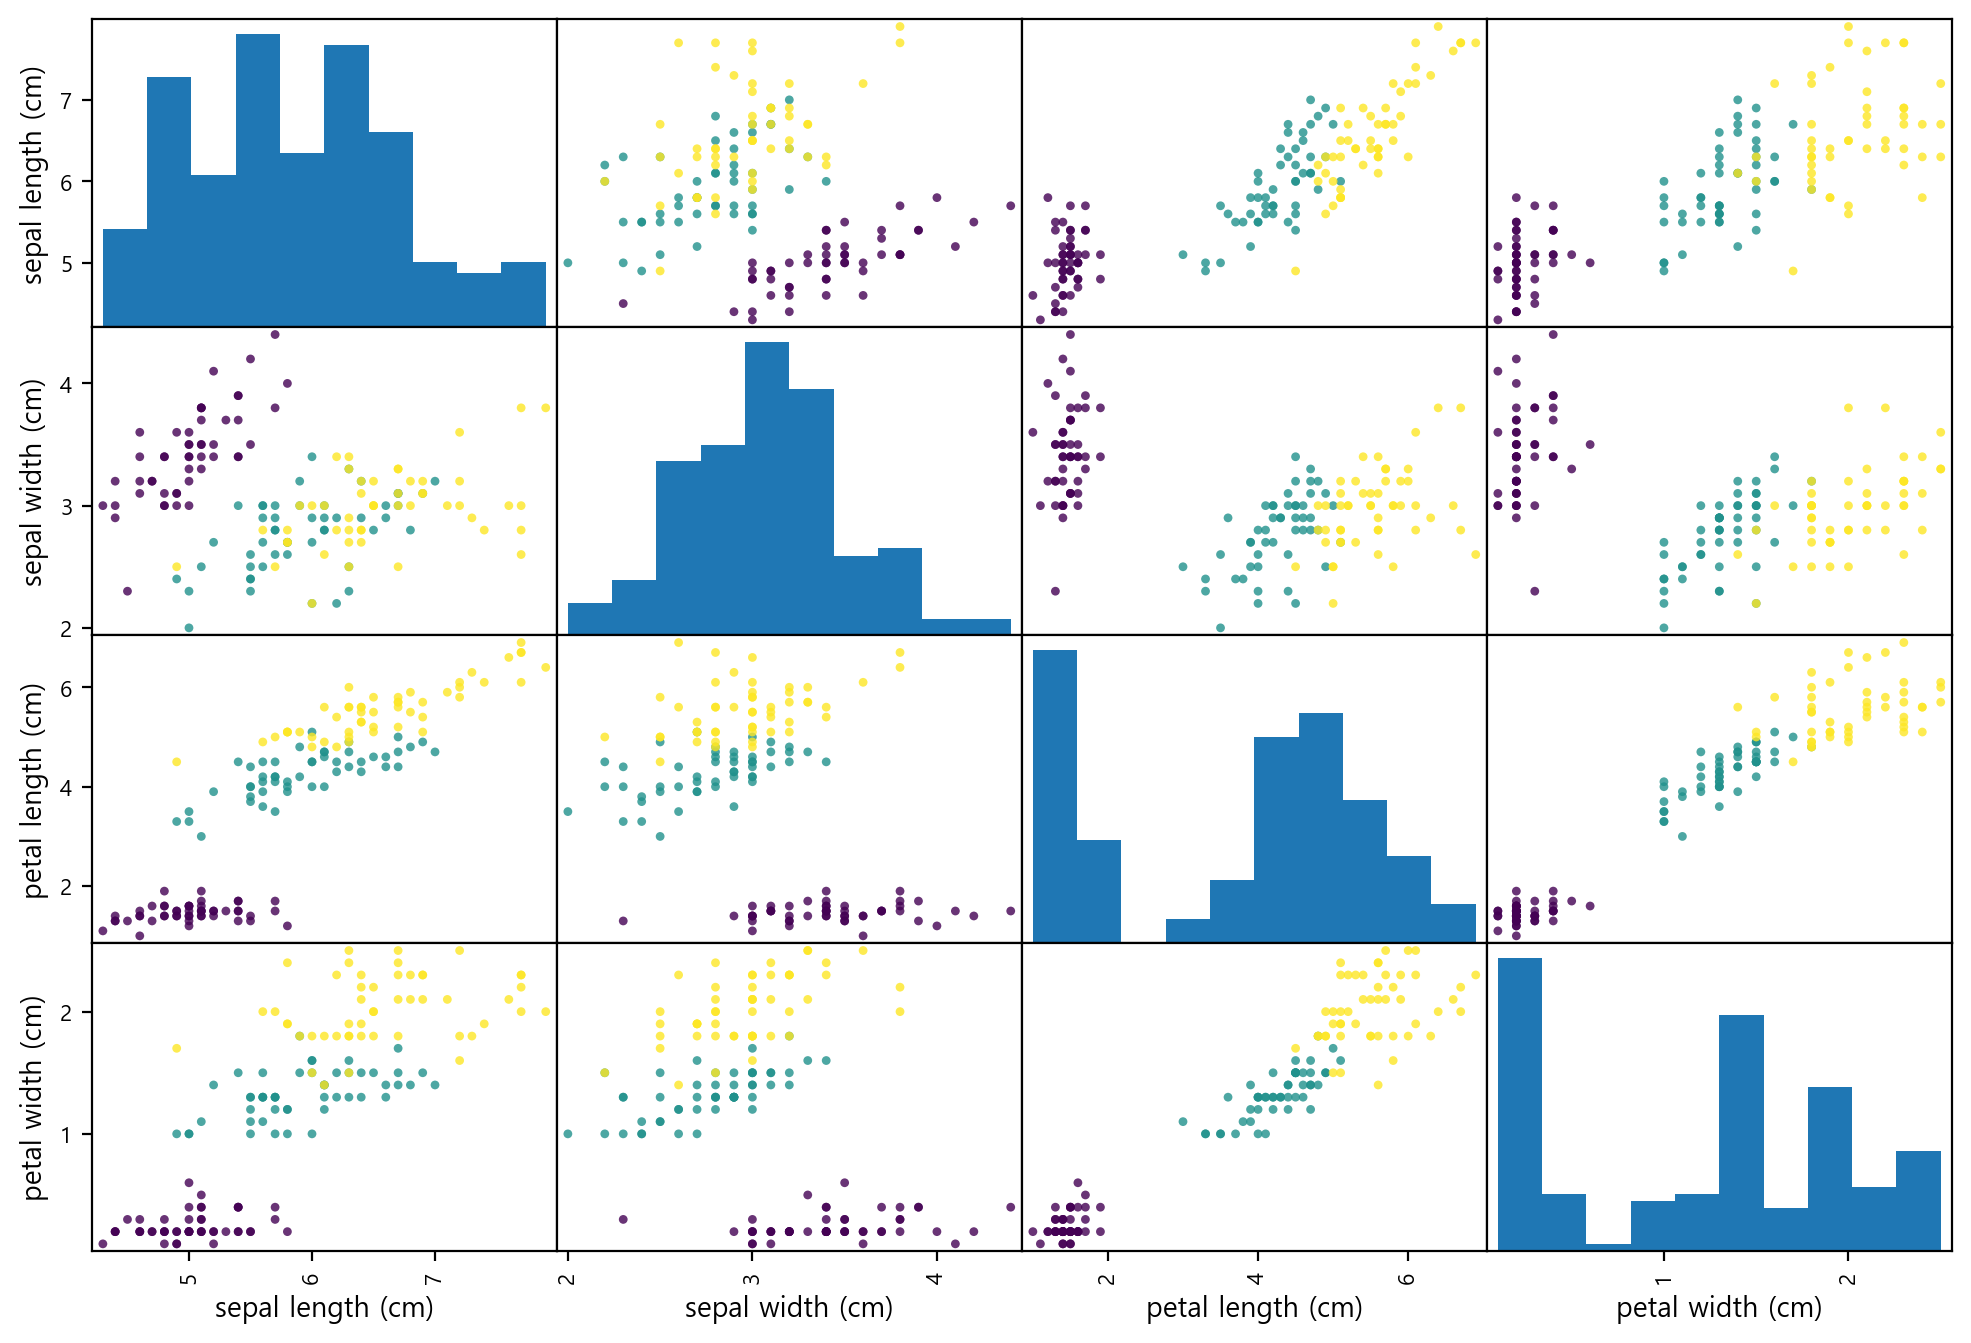

In [56]:
# 판다스의 scatter_matrix 함수를 사용해서 데이터 전체를 한 번에 시각화
# pd.plotting.scatter_matrix() 함수는 Pandas에서 산점 행렬(scatter matrix)을 생성하는 데 사용 
# 산점 행렬은 데이터프레임의 열 간의 상호 관계를 시각적으로 분석하기 위한 유용한 도구 
# 이 함수를 사용하면 데이터프레임의 열 간의 모든 가능한 산점도(두 열 간의 관계를 나타내는 그래프)를 하나의 그림에 표시할 수 있음 

from pandas.plotting import scatter_matrix

scatter_matrix(dataframe, c=iris['target'], marker='o', s=10,alpha=.8, figsize=(12,8))
plt.show()

In [57]:
# Featrue & Target 확인하기
# - 독립 변수와 종속 변수를 확인
X = iris.data                       # 독립변수 
y = iris.target                     # 종속변수 
feature_names = iris.feature_names  # 독립변수 속성명
target_names = iris.target_names    # 각 레이블 

print(X[:3])
print(y)
print(feature_names)
print(target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


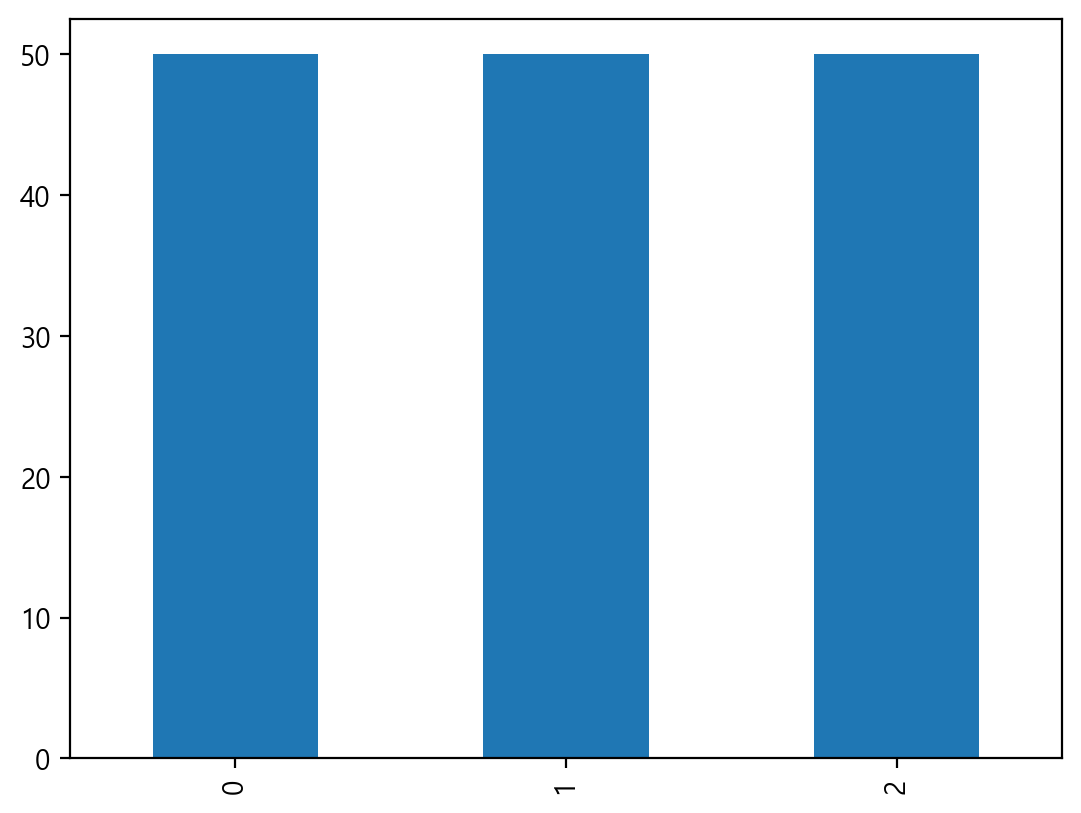

In [58]:
# 종속변수의 빈도 막대 그래프 
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

# Target 변수는 0, 1, 2로 범주화되어 있음 
# 150개가 50개씩 고르게 분포하고 있는 것을 확인할 수 있음 

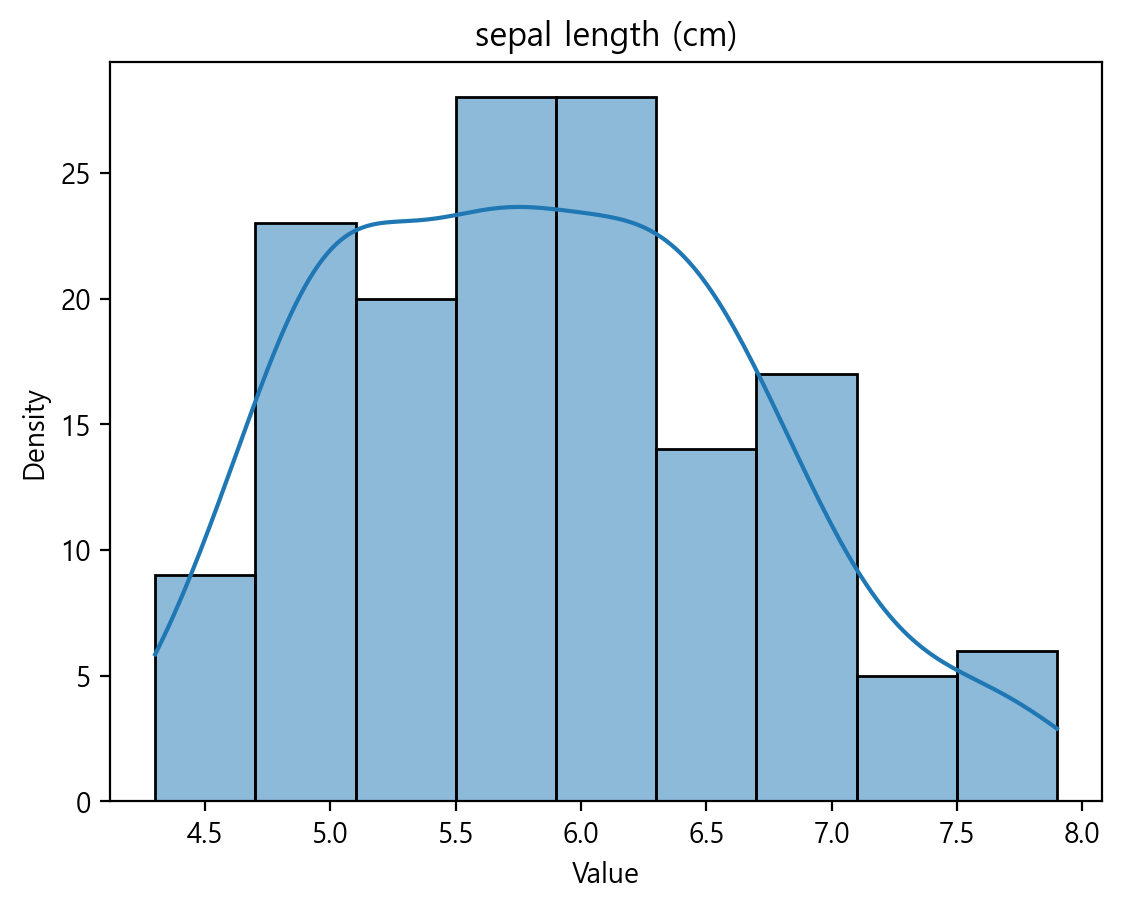

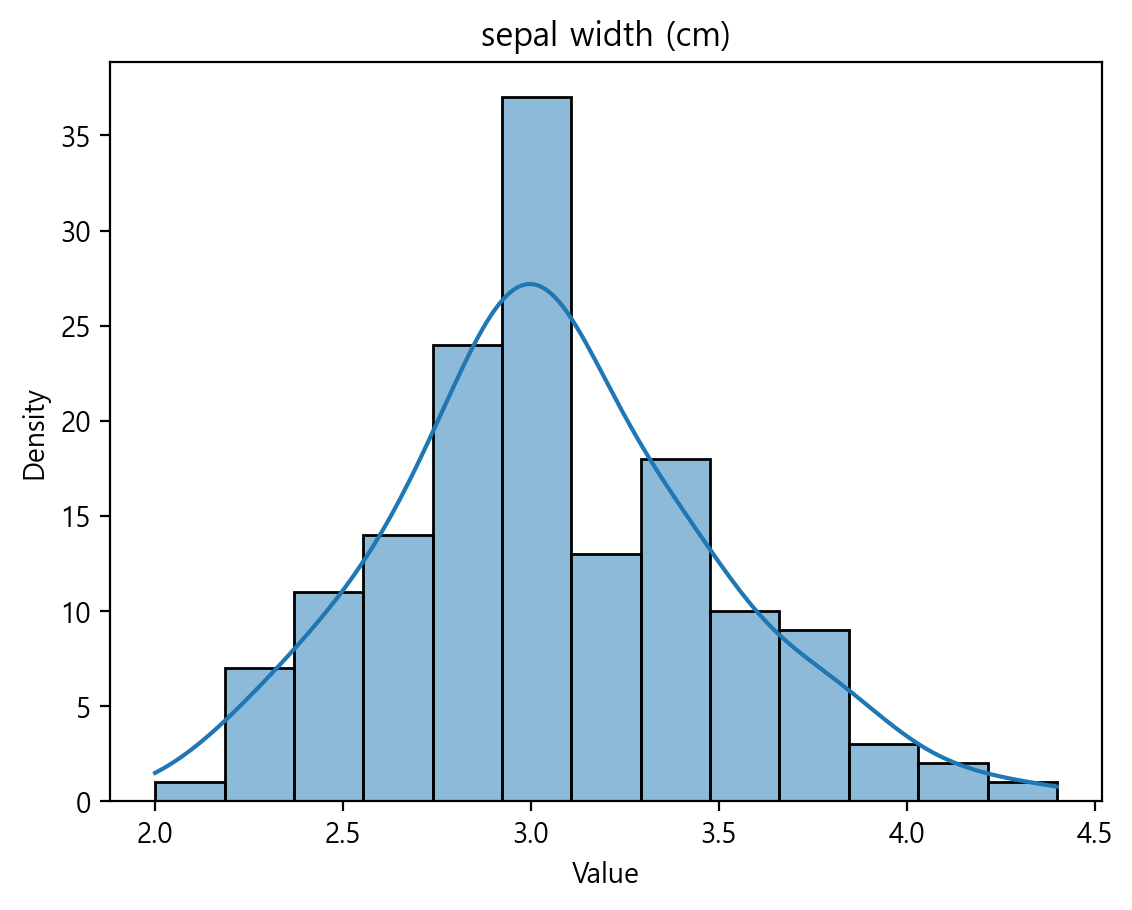

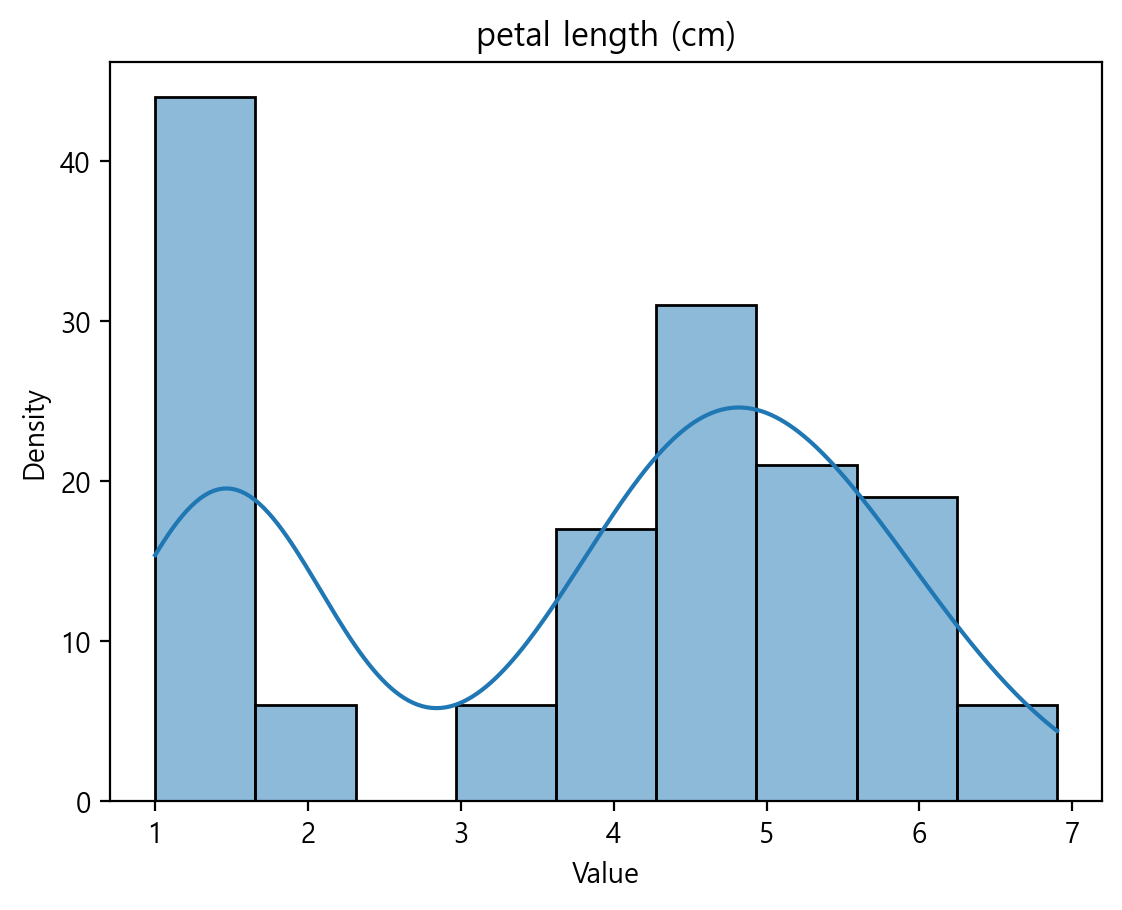

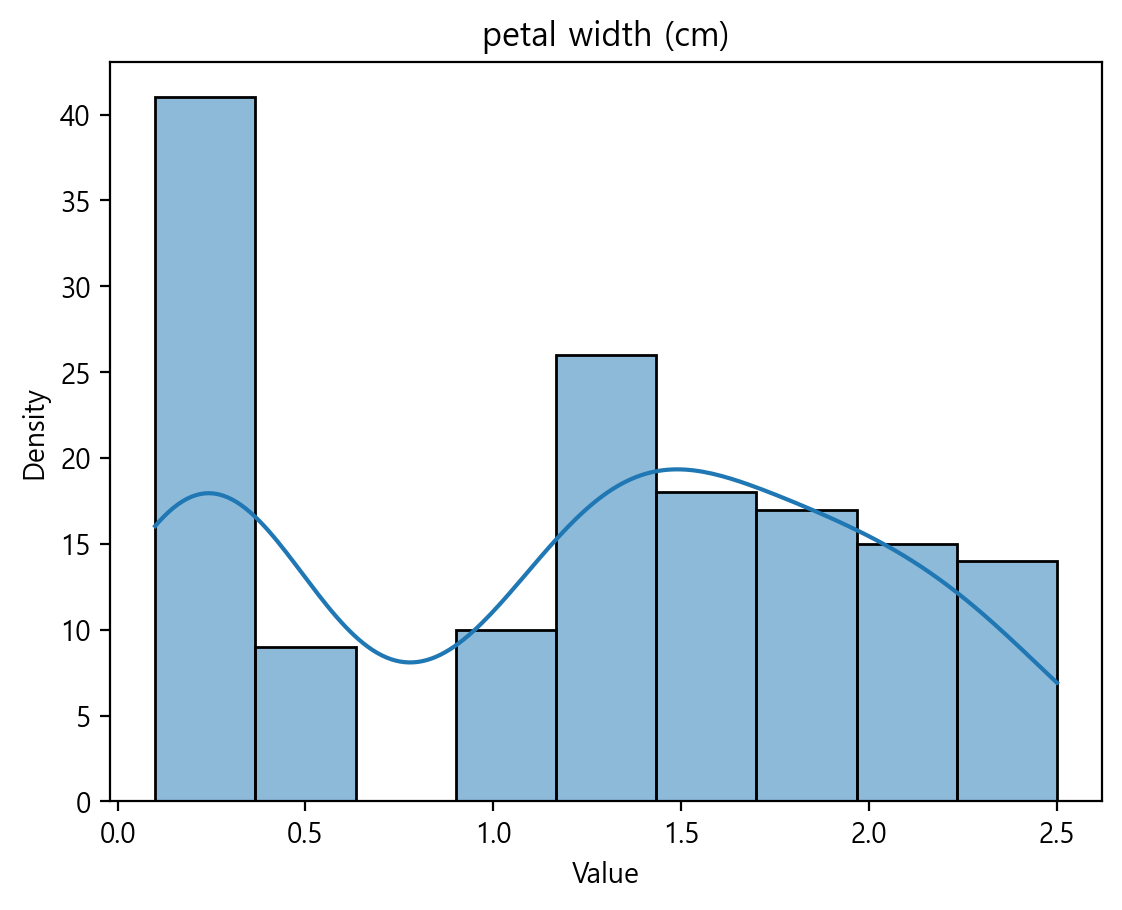

In [59]:
# 독립변수 DataFrame의 각 열에 대해 분포 플롯 그리기
# Features들은 정규분포에 가까운 그래프를 그려주는 것을 확인할 수 있음 

for i in range(df_X.shape[1]):
    sns.histplot(df_X.iloc[:, i], kde=True)  # kde=True를 통해 KDE 곡선을 추가할 수 있음
    plt.title(feature_names[i])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [60]:
# PCA(주성분 분석 : Principal Component Analysis) 
# sklearn을 통해서 PCA 객체 생성 및 PC값을 구할 수 있음 

pca = PCA()                  # PCA 객체 생성
pca.fit(X)                   # 독립변수로 학습 
PC_score = pca.transform(X)  # 독립변수(데이터)를 변환 
PC_score[:5]                  

# array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02, -2.26243707e-03],
#        [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01, -9.90265503e-02],
#        [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02, -1.99683897e-02],
#        [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,  7.55758166e-02],
#        [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,  6.12585926e-02]])

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [74]:
# pca의 고유벡터(eigen_vector) 확인 
pca.components_         

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [76]:
# 설명된 분산(explained_variance)를 통해서 PC값 들의 설명 정도를 확인할 수 있음
# 설명된 분산(explained_variance)은 고유값(eigenvalue)의 의미와 같음     

# 설명된 분산(explained_variance)의 값  
print(pca.explained_variance_)

# PC값이 클수록 설명력이 높음 
# 첫 번째, PC 값이 가장 크므로 가장 설명력이 높은 축일 것으로 생각할 수 있음
# 마지막 두 개의 PC를 보면 값이 낮음
# 마지막 값의 경우는 약 170배 정도의 설명력 차이가 나는 것을 알 수 있음 
# 즉, 거의 설명력이 없다고 생각할 수 있음 

# 고유값으로 설명된 분산의 비율(explained variance ratio)을 계산함   
print(pca.explained_variance_ / np.sum(pca.explained_variance_)) 

[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.05306648 0.01710261 0.00521218]


In [77]:
# 설명된 분산의 비율(explained variance ratio)을 확인할 수 있음 

ratio = pca.explained_variance_ratio_
ratio
# array([0.92461872, 0.05306648, 0.01710261, 0.00521218])
# PC1 이 92%의 설명력을 가지고 PC4가 0.5%의 설명력을 가지고 있음 

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

,V_ration
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


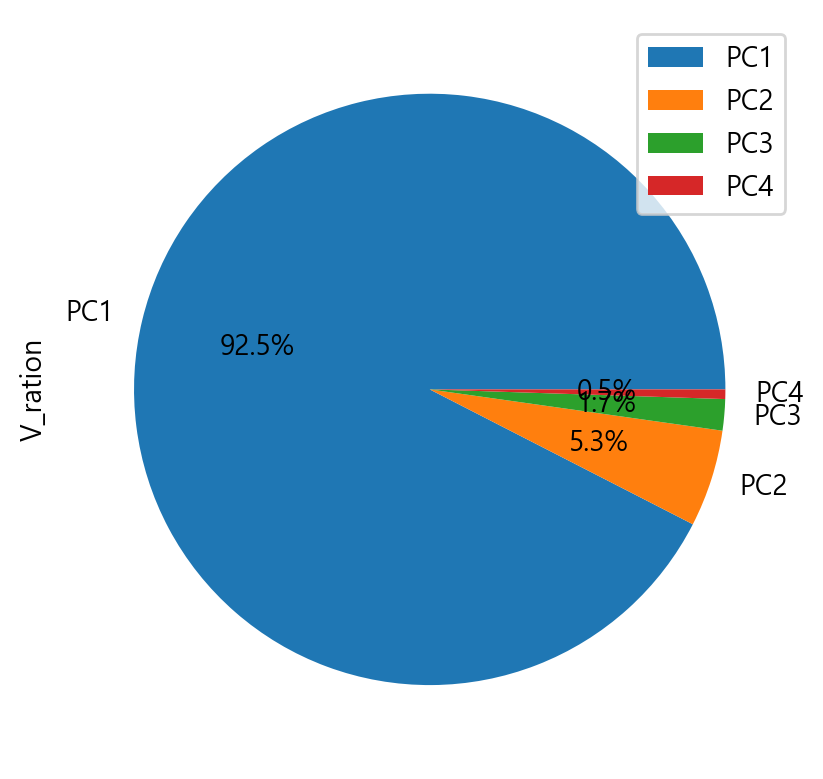

In [64]:
# pie plot 을 통해서 설명력의 정도를 확인
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration', labels=df_v.index, autopct='%1.1f%%')
df_v

Text(0.5, 1.0, 'PCA of IRIS dataset')

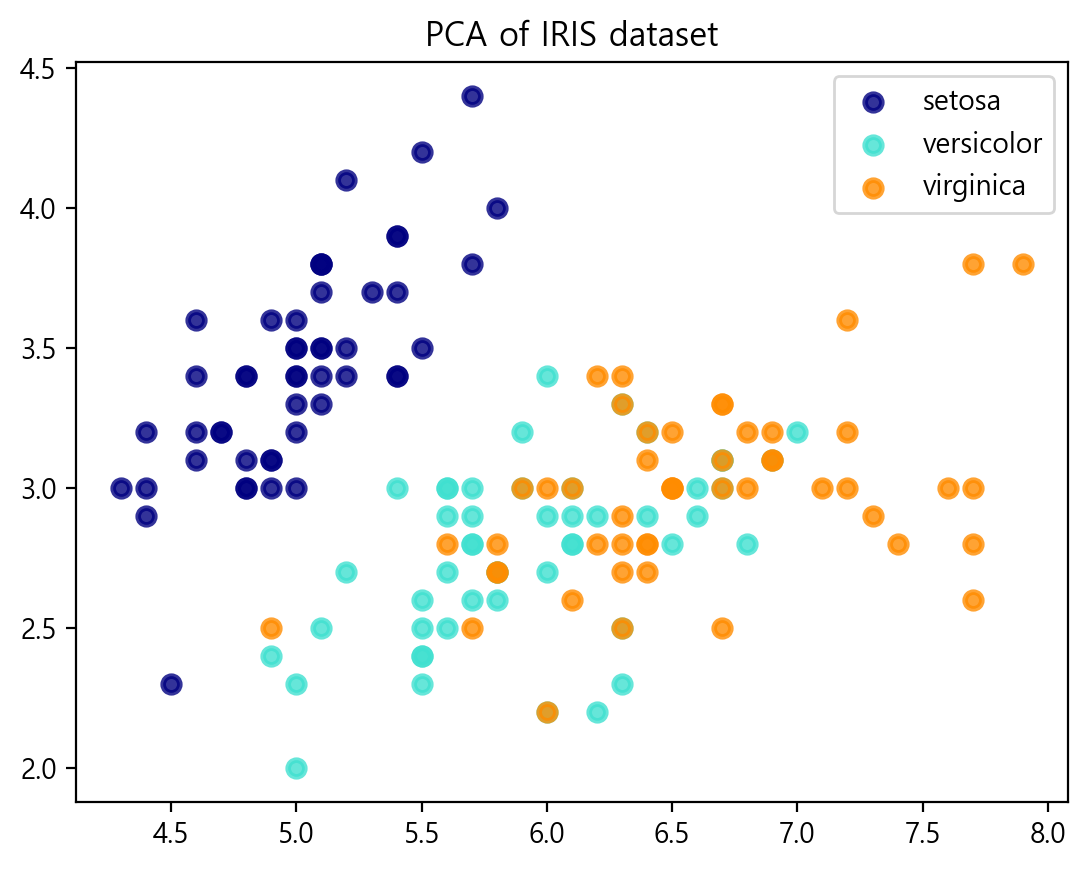

In [78]:
# PCA 분석 : 변수(feature)에 따른 분포 확인
# - X[0], X[1]을 통해서 IRIS 데이터를 확인
# - sepal length (cm), sepal width (cm)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Text(0.5, 1.0, 'PCA of IRIS dataset')

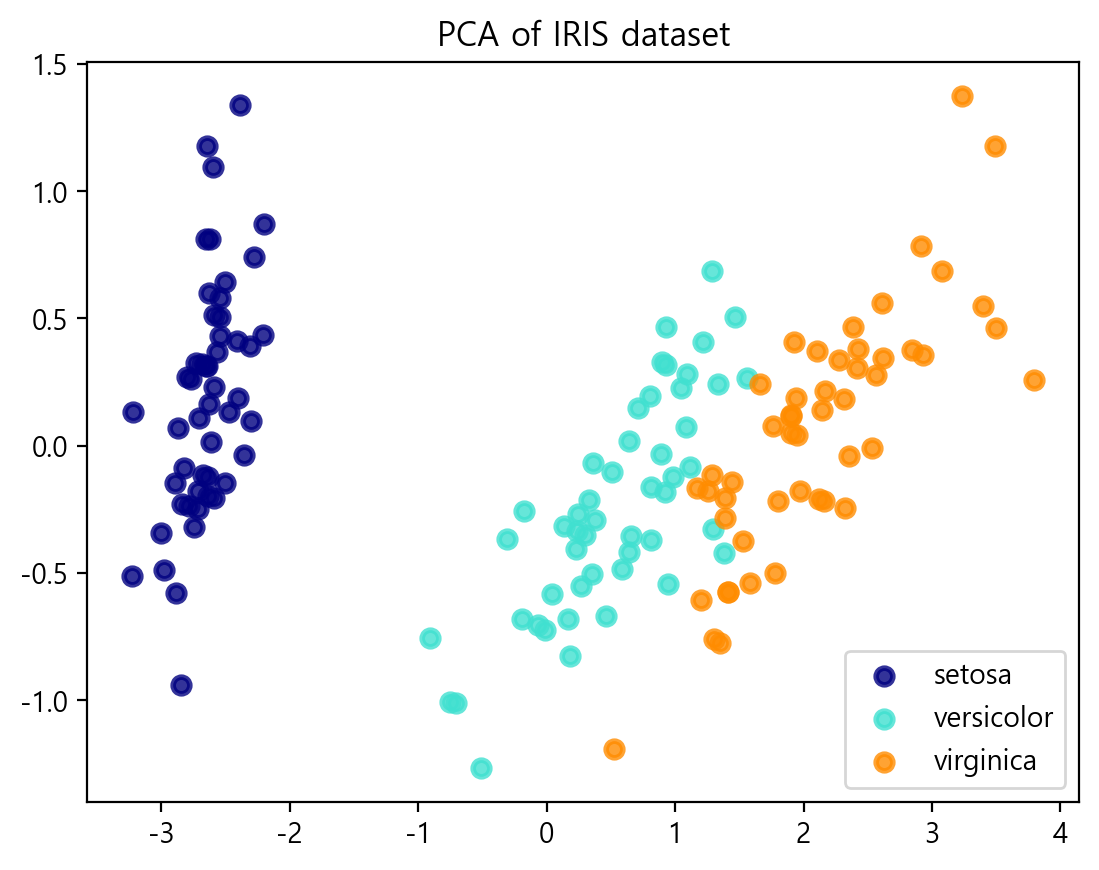

In [80]:
# PCA를 따른 데이터 분포 확인 : PC1, PC2에 의한 분포를 확인

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# 변수(sepal-length, sepal-width)의 산점도 보다 데이터들이 좀 더 구분이 잘 되는 것을 볼 수 있음 

## LogisticRegression 적용

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  

In [30]:
# feature 4개
# 4개의 feature와 4개의 PCscore를 모두 사용해서 결과를 확인
clf = LogisticRegression(max_iter=1000, random_state=0, multi_class='multinomial')  # 모델 생성 
clf.fit(X,y)                                                                        # 모델 학습 
pred = clf.predict(X)                                                               # 모델 예측 
confusion_matrix(y,pred)                                                            # 정오분류표 작성 

# 두 값이 동일한 것을 알 수 있음
# 모든 feature를 사용했을 때, 설명력이 동일하다고 생각할 수 있음

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [33]:
# PC score 4개
clf.fit(PC_score,y)                 # 모델 학습 
pred = clf.predict(PC_score)        # 모델 예측 
confusion_matrix(y,pred)            # 정오분류표 작성  

# 두 값이 동일한 것을 알 수 있음
# 모든 feature를 사용했을 때, 설명력이 동일하다고 생각할 수 있음

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [34]:
# 변수(feature) 2개 
# - sepal length (cm), sepal width (cm)

clf = LogisticRegression(max_iter=1000, random_state=0, multi_class='multinomial')
clf.fit(X[:,:2],y)
pred = clf.predict(X[:,:2])
confusion_matrix(y,pred)

# 두 결과가 확연하게 차이가 나는 것을 확인할 수 있음 
# PC1이 상당히 많은 설명력을 가지고 있기 때문에 PC1과 PC2만으로도 대부분을 분류할 수 있음
# model의 결과가 상당히 좋게 나온 것을 확인할 수 있음 
# 반면 그냥 iris.data의 feature의 첫 번째와 두 번째는 그다지 설명력이 별로 좋지 못한 것을 확인할 수 있음

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [35]:
# PC score 2개 
# - PC1, PC2 

clf2 = LogisticRegression(max_iter=1000, random_state=0, multi_class='multinomial')
clf2.fit(PC_score[:,:2],y)
pred = clf2.predict(PC_score[:,:2])
confusion_matrix(y,pred)

# 두 결과가 확연하게 차이가 나는 것을 확인할 수 있음 
# PC1이 상당히 많은 설명력을 가지고 있기 때문에 PC1과 PC2만으로도 대부분을 분류할 수 있음
# model의 결과가 상당히 좋게 나온 것을 확인할 수 있음 
# 반면 그냥 iris.data의 feature의 첫 번째와 두 번째는 그다지 설명력이 별로 좋지 못한 것을 확인할 수 있음 

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [ ]:
# 결론 
# PCA를 함으로써 성능을 높일 수 있나? 
# 어느 정도 성능을 유지하면서 연산 속도를 높일 수 있다고 보는 것이 바람직한 것 같음  
# 변수(feature)가 많을 때, 유사한 성능을 보이면서 빠르게 데이터를 분석할 수 있음 